# Employee Retention

## Goal

* Employee turn-over is a very costly problem for companies. The cost of replacing an employee is often huge, taking into account the time spent to interview and find a replacement. placement fees, signo- n bonuses, the loss of productivity for several months and impact on company morale when you see coworkers leave.
* It is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance.
* Goal: <span class="mark">**to predict when employees are going to quit by understanding the main drivers of employee churn.**</span>

## Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.
As said above, the goal is to predict employee retention and understand its main drivers. Specifically:
1. Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.
2. What are the main factors that drive employee churn? Do they make sense? 

* employee_id : id of the employee. Unique by employee per company
* company_id : company id. It is unique by company
* dept : employee dept
* seniority : number of yrs of work experience when hired
* salary: avg yearly salary of the employee during her tenure within the company
* join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13 
* quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns',30)

In [2]:
df = pd.read_csv('employee_retention_data.csv')

In [3]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


If the employee has not quit their job/(the quit-date is null), we will label them as 1. If the employee has quit their job(the quit-date is not null), we will label them as 0.

In [4]:
df['Status'] = np.where(pd.isnull(df['quit_date']), 0, 1)
#1 = left the company
#0 = still in the company

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
 7   Status       24702 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.5+ MB


In [6]:
#employee_id and company_id should be object
#join_date and quit_date should be date format

df['employee_id'] = df['employee_id'].astype('object')
df['company_id'] = df['company_id'].astype('object')

df['join_date'] = df['join_date'].astype('datetime64[ns]', errors='ignore')
df['quit_date'] = df['quit_date'].astype('datetime64[ns]', errors='ignore')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24702 non-null  object        
 1   company_id   24702 non-null  object        
 2   dept         24702 non-null  object        
 3   seniority    24702 non-null  int64         
 4   salary       24702 non-null  float64       
 5   join_date    24702 non-null  datetime64[ns]
 6   quit_date    13510 non-null  datetime64[ns]
 7   Status       24702 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 1.5+ MB


# 1. EDA

In [8]:
df.sample(5,random_state=42)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,Status
5339,894069.0,3,customer_service,7,65000.0,2014-10-02,NaT,0
12313,954256.0,2,customer_service,18,107000.0,2011-07-20,2013-09-06,1
21318,129267.0,2,marketing,9,142000.0,2013-08-19,2015-04-10,1
8048,448056.0,7,engineer,19,179000.0,2014-05-19,2015-05-01,1
1457,379387.0,2,data_science,10,206000.0,2013-04-29,2014-06-27,1


## 1.1 Company_id

which company has the lowest attrition rate

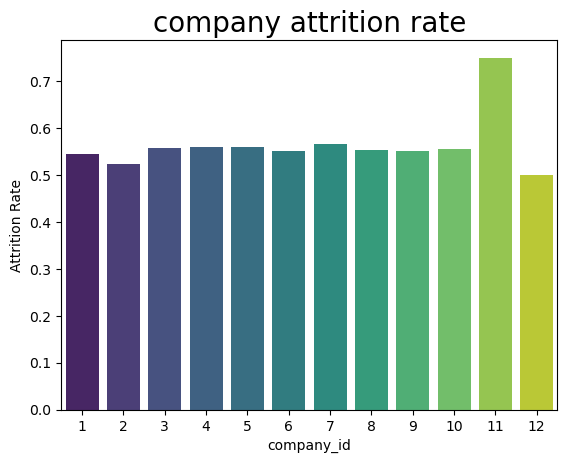

In [9]:
comp = df.groupby('company_id')['Status'].mean().to_frame().reset_index().sort_values(
    by='Status', ascending=False)

sns.barplot(x=comp['company_id'],y=comp['Status'],palette='viridis')
plt.title('company attrition rate',size=20)
plt.ylabel('Attrition Rate');


* on average, all the companies have very similar attrition rate except for the company 11 which has the highest attrition rate

## 1.2 Salaries

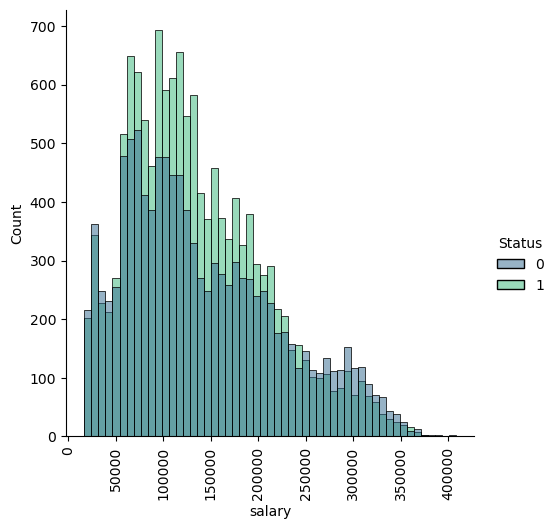

In [10]:
sns.displot(data=df,x='salary',
            hue='Status',
            palette='viridis')
plt.xticks(rotation=90);

* It appears that individuals with salaries above 250000 are more likely to remain with their current company.

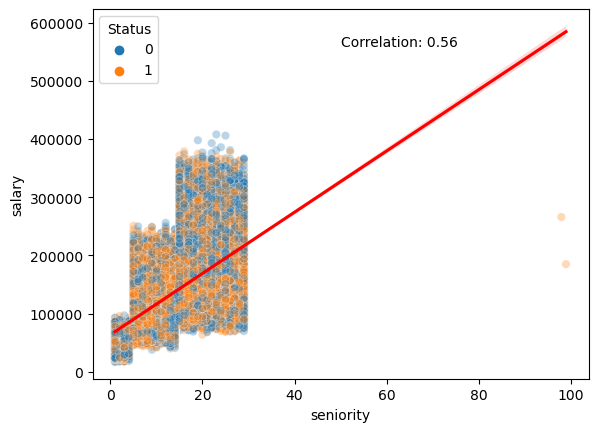

In [11]:
# Create a linear regression plot showing the relationship between salary and years of experience
sns.scatterplot(x='seniority',
                y='salary',
                data=df, 
                alpha=0.3,
                hue='Status')

sns.regplot(x='seniority', 
            y='salary', 
            data=df,
            scatter=False,
            color='red',
           )

# Calculate the R-squared value
corr = df['seniority'].corr(df['salary'])

# Add the R-squared value to the plot
plt.annotate("Correlation: {:.2f}".format(corr), xy=(0.5, 0.9), xycoords='axes fraction');



**Insights**:
* Moreover, we can see that seniority is positive correlated with salary (makes sense)
* we can see that there are fewer 1 in higher seniority (20 above)

## 1.3 Departments

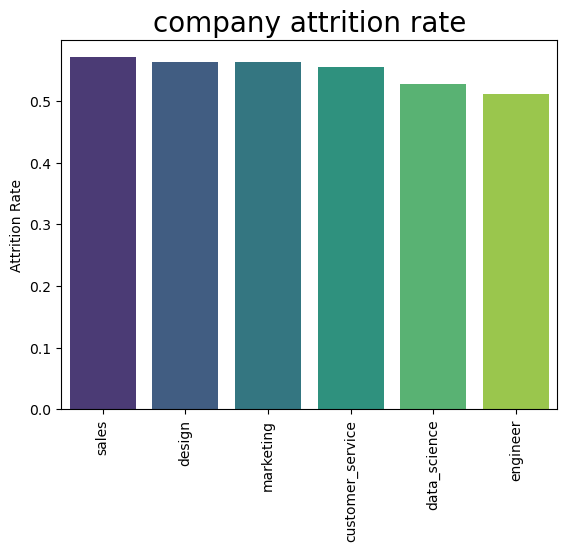

In [12]:
dept = df.groupby('dept')['Status'].mean().to_frame().reset_index().sort_values(
    by='Status', ascending=False)

sns.barplot(x=dept['dept'],y=dept['Status'],palette='viridis')
plt.title('company attrition rate',size=20)
plt.ylabel('Attrition Rate')
plt.xlabel(None)
plt.xticks(rotation=90);


**Insights**:
* <u>Tech positions(engineer/data science) have a lower attrition than sales and design positions<u/>
* **A few potential factors that may contribute to the lower attrition rate of tech positions**
    * `Tech positions may offer more opportunities for personal and professional growth`, as well as a sense of accomplishment, which may contribute to job satisfaction.
    * Tech positions may require a high level of technical expertise and problem-solving skills, which may be more challenging to acquire and maintain than the skills needed for sales and design positions. This may make tech positions more `rewarding and engaging for employees`, and may also make it more difficult for them to find comparable opportunities elsewhere.


## 1.4 Trend over time

create a table with 3 columns: day, employee_headcount, company_id.

In [13]:
# Define useful information
unique_dates = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
unique_companies = sorted(df['company_id'].unique())

# Initialize empty lists to store data
days = []
companies = []
headcounts = []

# Loop through each date and company
for date in unique_dates:
    for company in unique_companies:
        # Calculate the number of employees who joined and quit on or before this date
        total_join = len(df[(df['join_date'] <= date) & (df['company_id'] == company)])
        total_quit = len(df[(df['quit_date'] <= date) & (df['company_id'] == company)])
        
        # Calculate the headcount for this date and company
        headcount = total_join - total_quit
        
        # Store the date, company, and headcount
        days.append(date) #in each 'for company' loop, date will append to days
        companies.append(company)
        headcounts.append(headcount)

# Create a DataFrame to store the data
table = pd.DataFrame({'date': days, 'company_id': companies, 'employee_headcount': headcounts})


In [14]:
table

,date,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
...,...,...,...
21415,2015-12-13,8,468
21416,2015-12-13,9,432
21417,2015-12-13,10,385
21418,2015-12-13,11,4


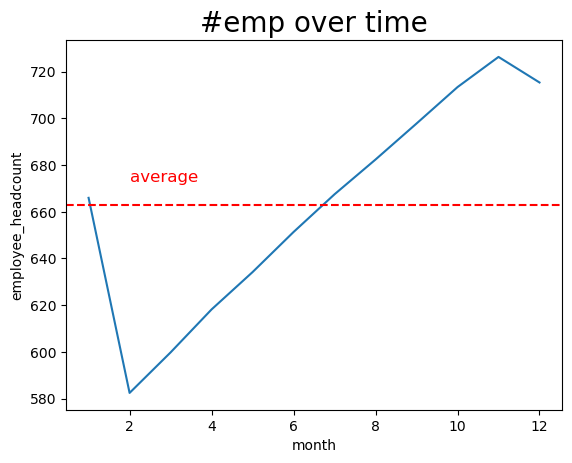

In [15]:
# Set the month
table['month'] = table['date'].dt.month

# # Create a time series plot showing the number of employees over time
sns.lineplot(x=table['month'],
             y=table['employee_headcount'],
             err_style=None)
plt.title('#emp over time',size=20)
plt.axhline(table['employee_headcount'].mean(),
            ls='--',
            color='red');

plt.text(x=2, 
         y=table['employee_headcount'].mean()+10, 
         s='average', 
         color='red', 
         fontsize=12);



**Insights**:
* From a business standpoint, the trend of increasing employee headcount from February to November and decreasing employee headcount from December to February may indicate `seasonal patterns in the hiring and retention of employees`. 
    * For example, the company may experience an increase in demand for its products or services during the spring and summer months, leading to an increase in hiring. Conversely, the company may experience a slowdown in demand during the winter months, leading to a decrease in hiring or an increase in employee departures.
* Understanding these seasonal patterns can help the company `anticipate and plan for changes in its workforce needs`, and may also `inform decisions about employee training and development, budgeting, and resource allocation`.
* It's worth noting that this trend may not be evident in all companies or industries, and that there may be other factors at play that influence the hiring and retention of employees. Therefore, it's important to consider the specific context and needs of the company when interpreting and acting on this trend.

# 2. Machine Learning

**The length of time an employee has been with the company might be an interesting feature for machine learning**

In [16]:
df['length'] = df['quit_date'] - df['join_date']
df['length'] = df['length'].astype('string')
df['length'] = df['length'].str.replace('days','')

df['diff'] = pd.to_datetime('2015-12-13') - df['join_date']
df['diff'] = df['diff'].astype('string')
df['diff'] = df['diff'].str.replace('days','')
df['length'] = df['length'].fillna(df['diff'])
df.drop(['diff','join_date','quit_date'],axis=1,inplace=True)
df.length = df.length.astype('int')

In [17]:
X = df.drop(['employee_id','company_id','Status'],axis=1)
y = df.Status

In [18]:
X_category = X.select_dtypes(['object']).astype('category')
print('These are the reference levels') 
print('----------------------------') 
X_category.apply(lambda x: x.cat.categories[0])

These are the reference levels
----------------------------


dept    customer_service
dtype: object

**We will use logistic regression mainly to extract insights**

In [19]:
#get dummies
X = pd.get_dummies(X,drop_first=True)

#add intercept for multiple logistic regression
X['intercept'] = 1

#it is not necessary to scale the numeric data for logit or random forests

In [20]:
#alpha = 0.05

#display full decimal
pd.set_option('display.float_format', lambda x: '%.6f' % x)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

logit_1 = sm.Logit(y,X).fit()
output_table = pd.DataFrame({'coef':logit_1.params,
                                 'Standard error':logit_1.bse,
                                 'test-statistics':logit_1.tvalues,
                                 'p_values':logit_1.pvalues}).reset_index()
output_table = output_table.rename(columns={'index':'variables'})
output_table

Optimization terminated successfully.
         Current function value: 0.679649
         Iterations 4


,variables,coef,Standard error,test-statistics,p_values
0,seniority,0.011375,0.002447,4.649235,0.000003
1,salary,-0.000002,0.000000,-6.069784,0.000000
2,length,0.000704,0.000037,19.198827,0.000000
3,dept_data_science,0.120809,0.060323,2.002719,0.045207
4,dept_design,0.145628,0.061769,2.357599,0.018394
5,dept_engineer,0.058880,0.056568,1.040868,0.297937
6,dept_marketing,0.150666,0.046016,3.274248,0.001059
7,dept_sales,0.188670,0.046117,4.091140,0.000043
8,intercept,-0.156146,0.036935,-4.227583,0.000024


If the p-value of a feature coefficient is smaller than 0.05, it indicates that the coefficient is statistically significant and that the corresponding predictor variable is likely to have an effect on the outcome. This means that a unit change in the predictor variable is likely to be associated with a change in the log odds of the outcome.

**check multicollinearity**

In [21]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,VIF
0,seniority,2.336214
1,salary,4.274993
2,length,1.005075
3,dept_data_science,2.460472
4,dept_design,1.204140
5,dept_engineer,2.925190
6,dept_marketing,1.416105
7,dept_sales,1.420445
8,intercept,8.198772


All vif is small and there is no multicollinearity issue

In [22]:
#filter out variables whose p values are less than 0.05
X.drop(output_table[output_table['p_values'] > 0.05]['variables'].values,axis=1,inplace=True)

In [23]:
logit_2 = sm.Logit(y,X).fit()
output_table = pd.DataFrame({'coef':logit_2.params,
                                 'Standard error':logit_2.bse,
                                 'test-statistics':logit_2.tvalues,
                                 'p_values':logit_2.pvalues}).reset_index()
output_table = output_table.rename(columns={'index':'variables'})
output_table

Optimization terminated successfully.
         Current function value: 0.679671
         Iterations 4


,variables,coef,Standard error,test-statistics,p_values
0,seniority,0.009904,0.001996,4.962165,0.000001
1,salary,-0.000002,0.000000,-8.169161,0.000000
2,length,0.000704,0.000037,19.192314,0.000000
3,dept_data_science,0.077816,0.043946,1.770712,0.076609
4,dept_design,0.121970,0.057430,2.123809,0.033686
5,dept_marketing,0.127228,0.040126,3.170731,0.001521
6,dept_sales,0.165107,0.040174,4.109820,0.000040
7,intercept,-0.149864,0.036436,-4.113079,0.000039


In [24]:
#filter out dept_design
X.drop(output_table[output_table['p_values'] > 0.05]['variables'].values,axis=1,inplace=True)
logit_3 = sm.Logit(y,X).fit()
output_table = pd.DataFrame({'coef':logit_3.params,
                                 'Standard error':logit_3.bse,
                                 'test-statistics':logit_3.tvalues,
                                 'p_values':logit_3.pvalues}).reset_index()
output_table = output_table.rename(columns={'index':'variables'})
output_table

Optimization terminated successfully.
         Current function value: 0.679734
         Iterations 4


,variables,coef,Standard error,test-statistics,p_values
0,seniority,0.009003,0.001929,4.666186,0.000003
1,salary,-0.000002,0.000000,-8.199047,0.000000
2,length,0.000704,0.000037,19.192140,0.000000
3,dept_design,0.107619,0.056852,1.892944,0.058365
4,dept_marketing,0.113013,0.039313,2.874687,0.004044
5,dept_sales,0.150817,0.039353,3.832409,0.000127
6,intercept,-0.146289,0.036376,-4.021560,0.000058


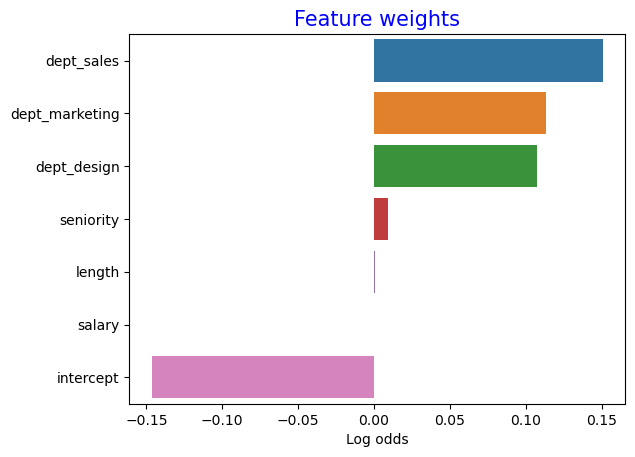

In [25]:
#base cate: customer_service
output_table = output_table.sort_values(by='coef',ascending=False)
sns.barplot(data=output_table, y='variables',x='coef');
plt.title('Feature weights',fontsize=15,color='blue')
plt.xlabel('Log odds')
plt.ylabel(None);

**background**: what is odd?
odds = P(event occurring) / P(event not occurring)

* The log odds is a measure of the odds of an outcome occurring. The odds is defined as the probability of the outcome occurring divided by the probability of the outcome not occurring.

* A log odds of 0 indicates that the odds of the outcome occurring are equal to the odds of the outcome not occurring. In other words, there is an equal chance of the outcome occurring or not occurring.

* A positive log odds indicates that the odds of the outcome occurring are greater than the odds of the outcome not occurring. In other words, there is a higher probability of the outcome occurring.

* A negative log odds indicates that the odds of the outcome occurring are less than the odds of the outcome not occurring. In other words, there is a lower probability of the outcome occurring.

* The magnitude of the log odds tells you the strength of the relationship between the predictor variable and the outcome. For example, a log odds of 1 is stronger than a log odds of 0.5, which is in turn stronger than a log odds of 0.1.

**Insights**:

* We can see that sales and marketing department compared to customer services department(base line) are more likely to leave (1).
* `If the log odds of seniority is positive, it means that as an employee's seniority increases, the probability that they will leave the company also increases.` In other words, employees with more years of experience are more likely to leave the company than those with less experience. This could be due to a variety of factors, such as higher pay, better job opportunities, or simply a desire for a change. It's important to note that this is just a general trend and may not hold true for every individual case.
* Length is positive but its log odds are extremely small. `It means that employee tenure has a relatively weak influence on the outcome(attrition) compared to other variables in the model.` However, it is still important to consider this variable as it may still have some influence on the outcome.
* The salary's coefficient is extremely small (-0.000002). If the salary coefficient is negative and small in a model, it means that salary `has a relatively weak negative influence on the attrition compared to other variables in the model`. This could suggest that `higher salaries are associated with a lower likelihood of attrition.` From a business standpoint, if the salary coefficient is negative and small, it could indicate that salary is not a strong predictor of the employee retention. This could suggest that other factors, such as work environment, job satisfaction, or job responsibilities, may be more important in influencing the outcome.
